<a href="https://colab.research.google.com/github/phpons/minimum-labeled-spanning-tree-solver/blob/master/PAGRM_Otimiza%C3%A7%C3%A3o_Corre%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Implementation

## Imports

In [ ]:
import random
import copy
import math
import time
import pandas as pd

## Graph Representation

In [ ]:
"""
Graph class with all the data structures
- graph{} contains the relationship between vertices and edges
- label_edges{} contains the current label's edges
- deleted_label_edges{} contains the deleted label's 

Currently, the class holds methods for:
- Adding edges
- Adding vertices
- Removing edges 
  - Removing all edges associated with a label L
- Graph description
"""

class Graph():
  def __init__(self):
    self.graph = {}
    self.label_edges = {}
    self.deleted_label_edges = {}

  def add_vertex(self, vertex):
    self.graph[vertex] = set()

  def add_edge(self, edge):
    vertex1, vertex2, color = edge
    self.add_label_edge(color, edge)
    self.add_graph_edge(color, vertex1, vertex2)
  
  def add_graph_edge(self, label, vertex1, vertex2):
    if vertex1 not in self.graph:
      self.add_vertex(vertex1)
    if vertex2 not in self.graph:
      self.add_vertex(vertex2)

    self.graph[vertex1].add((vertex2, label))
    self.graph[vertex2].add((vertex1, label))
  
  def add_label_edge(self, label, edge):
    if label not in self.label_edges:
      self.label_edges[label] = set()
    
    self.label_edges[label].add(edge)
  
  def remove_edge(self, edge):
    vertex1, vertex2, color = edge
 
    self.graph[vertex1].remove((vertex2, color))
    self.graph[vertex2].remove((vertex1, color))

  def remove_label_edges(self, label):
    for edge in self.label_edges[label]:
      self.remove_edge(edge)
    
    self.deleted_label_edges[label] = self.label_edges.pop(label, None)

  def recover_label_edges(self, label):
    for edge in self.deleted_label_edges[label]:
      self.add_edge(edge)
  
  def neighbors(self, vertex):
    return self.graph[vertex]
  
  def vertices(self):
    return set(self.graph.keys())

  def label_count(self):
    return len(self.label_edges.keys())

## Optimization Functions

### Auxiliary Functions

In [ ]:
"""
Utilizes BFS to check whether a graph is spanning or not
"""
def is_spanning(g):
  root = list(g.graph.keys())[0]
  explored = set()
  frontier = [root]

  while frontier:
    v = frontier.pop(0)
    explored.add(v)

    for n, c in g.neighbors(v):
      if n not in explored:
        frontier.append(n)

  return (len(explored) == len(g.vertices()))

In [ ]:
"""
Objective function to be used along with the metaheuristic
The least label counts, the better
"""
def objective_function(g):  
  return 10 * -g.label_count()

In [ ]:
"""
Chooses a neighbor state, given a graph G
- Case 1:
  - Chooses a random label from the graph and removes all its edges
- Case 2:
  - Readds a previously deleted label's edges to the graph

needed_labels{} -> Set of labels that are knownly necessary for the graph to be spanning
"""
def choose_neighbor(g):
  global needed_labels # 

  possible_labels = list(g.label_edges.keys())
  possible_labels = list(set(possible_labels) - needed_labels)
  random.shuffle(possible_labels)
  
  for l in possible_labels:
    aux_g = copy.deepcopy(g)
    aux_g.remove_label_edges(l)

    if is_spanning(aux_g):
      return aux_g
    else:
      needed_labels.add(l)
  
  needed_labels = set()
  possible_recovered_labels = list(g.deleted_label_edges.keys())

  aux_g = copy.deepcopy(g)
  if len(possible_recovered_labels) > 0:
    aux_g.recover_label_edges(random.choice(possible_recovered_labels))

  return aux_g

### Simulated Annealing


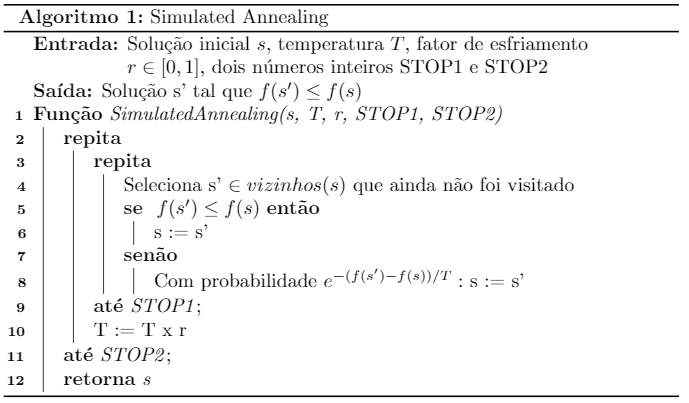

In [ ]:
from tqdm.notebook import tqdm # Progress bar

In [ ]:
"""
Simulated Annealing metaheuristic
Follows the above image's logic
"""

def simulated_annealing(graph, T, R, STOP1, STOP2, F=objective_function):
  S = copy.deepcopy(graph)

  for i in tqdm(range(STOP2)):
    for _ in range(STOP1):
      S_ = choose_neighbor(S) 
      delta_F = F(S_) - F(S)
      
      if delta_F > 0:
        S = S_    
      elif random.random() < math.exp(delta_F/T):
        S = S_

    T = T * R
  
  return S

# Testing

## Instances Loading

In [ ]:
"""
Returns a Graph from a formatted file
"""
def create_graph(file_name):
  newg = Graph()

  lines = open(file_name,'r').readlines()
  first = lines[0]

  for line in lines[2:]:
    u,v,c = map(int,line.split())   
    newg.add_edge((u,v,c))

  return newg

In [ ]:
"""
Dictionary with the instances names and BKS
{
'instance_name': BKS_VALUE
}
"""
instances_dict = {
  'testFile_0_10_5.col': 5,
  'testFile_7_75_37.col': 10,
  'testFile_9_75_60.col': 7,
  'testFile_11_75_93.col': 20,
  '100-990-25-3-1': 8,
  '100-990-25-3-4': 5,
  '100-990-50-6-7': 14,
  '100-990-50-6-8': 7,
  '100-990-100-6-5': 17,
  '100-990-125-7-4': 11
}

In [ ]:
"""
Downloads the instances from Github
"""
for instance_name in instances_dict.keys():
  url = "https://raw.githubusercontent.com/tiagodrehmer/INF05100_Problems/master/instances/MLST/" + instance_name
  !wget $url

--2021-05-18 05:37:49--  https://raw.githubusercontent.com/tiagodrehmer/INF05100_Problems/master/instances/MLST/testFile_0_10_5.col
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 63 [text/plain]
Saving to: ‘testFile_0_10_5.col.1’

testFile_0_10_5.col 100%[===================>]      63  --.-KB/s    in 0s      

2021-05-18 05:37:49 (2.49 MB/s) - ‘testFile_0_10_5.col.1’ saved [63/63]

--2021-05-18 05:37:49--  https://raw.githubusercontent.com/tiagodrehmer/INF05100_Problems/master/instances/MLST/testFile_7_75_37.col
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, await

## Instance Testing Function

In [ ]:
"""
Runs Simulated Annealing on ALL instances
Returns a dataframe with results and statistics
"""
def test_instances(instances_dict, T, R, STOP1, STOP2, max_seed):
  global needed_labels # This variable is reset for every seed so as not to affect the neighborhood generation.
  results = []

  for instance_name, best_known_solution in instances_dict.items():
    g = create_graph('/content/' + instance_name)
    initial_solution = g.label_count()

    for i in range(1, max_seed+1):
      needed_labels = set()
      
      start = time.time()
      random.seed(i)
      new_g = simulated_annealing(g, T, R, STOP1, STOP2)
      end = time.time()
      
      d = {
            'instance': instance_name, 
            'seed': i, 
            'SA_solution': new_g.label_count(), 
            'bks': best_known_solution, 
            'execution_time': end-start, 
            'dev_from_bks': 100/best_known_solution * (new_g.label_count() - best_known_solution),
            'initial_solution': initial_solution
          }
          
      results.append(d)

  results_df = pd.DataFrame.from_dict(results)
  return results_df

In [ ]:
"""
Runs Simulated Annealing on a SINGLE instance
Returns a dataframe with results and statistics
"""
def test_instance(instance_name, best_known_solution, T, R, STOP1, STOP2, seed_number):
  global needed_labels # This variable is reset for every seed so as not to affect the neighborhood generation.
  needed_labels = set()

  g = create_graph('/content/' + instance_name)
  initial_solution = g.label_count()
  
  start = time.time()
  random.seed(seed_number)
  new_g = simulated_annealing(g, T, R, STOP1, STOP2)
  end = time.time()
  
  results = {
        'instance': instance_name, 
        'seed': seed_number, 
        'SA_solution': new_g.label_count(), 
        'bks': best_known_solution, 
        'execution_time': end-start, 
        'dev_from_bks': 100/best_known_solution * (new_g.label_count() - best_known_solution),
        'initial_solution': initial_solution
      }

  results_df = pd.DataFrame.from_dict([results])
  return results_df

## Test all instances


This is the code we used to obtain the results for all instances. <br>
We ran the tests for each instance with seeds from [1,10].

In [ ]:
# results_df = test_instances(instances_dict, T=1000, R=0.98, STOP1=5, STOP2=200, max_seed=10)

In [ ]:
# results_df.groupby('instance')[['SA_solution', 'execution_time', 'bks', 'dev_from_bks']].mean()

In [ ]:
# results_df.to_csv('metaheuristic_results.csv', index=False)

## Single instance testing


In [ ]:
"""
Set the parameters for Simulated Annealing
T = Initial Temperature
R = Cooling Factor
STOP1 = # of iterations for the inner loop
STOP2 = # of iterations for the outer loop
seed_number = Seed for the random number generator
"""
T = 1000
R = 0.98
STOP1 = 5
STOP2 = 200
seed_number = 1

In [ ]:
#@title Choose an instance to be tested { run: "auto" }

instance_name = "100-990-25-3-1" #@param ["testFile_0_10_5.col", "testFile_7_75_37.col", "testFile_9_75_60.col", "testFile_11_75_93.col", "100-990-25-3-1", "100-990-25-3-4", "100-990-50-6-7", "100-990-50-6-8", "100-990-100-6-5", "100-990-125-7-4"]
instance_bks = instances_dict[instance_name]

results_df = test_instance(instance_name, instance_bks, T, R, STOP1, STOP2, seed_number)
results_df

,instance,seed,SA_solution,bks,execution_time,dev_from_bks,initial_solution
0,100-990-25-3-1,1,6,8,29.978527,-25.0,25
